# LFY031 - Exempel med pandas
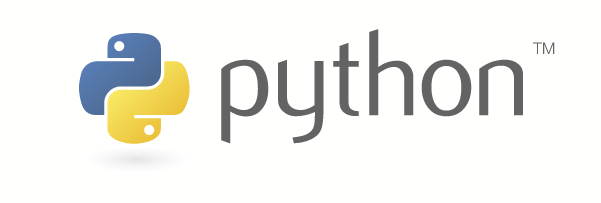
Fredrik Skärberg

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

* Dataset som innehåller information om matpriser, köttpriser, mejeripriser, spannmålspriser, oljepriser och sockerpriser.
* Från 1990-2022
* Department of Agriculture i USA (USDA)

In [3]:
df = pd.read_csv('FAOFP1990_2022.csv')

In [5]:
df.head(5)

,"Date ""Food.Price.Index"" ""Meat"" ""Dairy"" ""Cereals"" ""Oils"" ""Sugar"""
0,"1 ""01/01/1990"" 64.1 73.4 53.5 64.1 44.59 87.9"
1,"2 ""01/02/1990"" 64.5 76 52.2 62.2 44.5 90.7"
2,"3 ""01/03/1990"" 63.8 77.8 41.4 61.3 45.75 95.1"
3,"4 ""01/04/1990"" 65.8 80.4 48.4 62.8 44.02 94.3"
4,"5 ""01/05/1990"" 64.4 81 39.2 62 45.5 90.4"


Dela värdena till kolumner \ kan användas för att separera rader i kod.

In [6]:
df[['Index','Date','Food','Meat', "Dairy" ,"Cereals" ,"Oils" ,"Sugar"]] = \
df['Date "Food.Price.Index" "Meat" "Dairy" "Cereals" "Oils" "Sugar"'].str.split(' ', n=7, expand=True)

In [8]:
df.head(5)

,"Date ""Food.Price.Index"" ""Meat"" ""Dairy"" ""Cereals"" ""Oils"" ""Sugar""",Index,Date,Food,Meat,Dairy,Cereals,Oils,Sugar
0,"1 ""01/01/1990"" 64.1 73.4 53.5 64.1 44.59 87.9",1,"""01/01/1990""",64.1,73.4,53.5,64.1,44.59,87.9
1,"2 ""01/02/1990"" 64.5 76 52.2 62.2 44.5 90.7",2,"""01/02/1990""",64.5,76,52.2,62.2,44.5,90.7
2,"3 ""01/03/1990"" 63.8 77.8 41.4 61.3 45.75 95.1",3,"""01/03/1990""",63.8,77.8,41.4,61.3,45.75,95.1
3,"4 ""01/04/1990"" 65.8 80.4 48.4 62.8 44.02 94.3",4,"""01/04/1990""",65.8,80.4,48.4,62.8,44.02,94.3
4,"5 ""01/05/1990"" 64.4 81 39.2 62 45.5 90.4",5,"""01/05/1990""",64.4,81,39.2,62,45.5,90.4


Ta bort initiala raden eftersom att den är ganska så konstig...

In [9]:
#Ta bort initiala raden
df.drop(['Date "Food.Price.Index" "Meat" "Dairy" "Cereals" "Oils" "Sugar"'], axis=1, inplace=True)
df.head()

,Index,Date,Food,Meat,Dairy,Cereals,Oils,Sugar
0,1,"""01/01/1990""",64.1,73.4,53.5,64.1,44.59,87.9
1,2,"""01/02/1990""",64.5,76,52.2,62.2,44.5,90.7
2,3,"""01/03/1990""",63.8,77.8,41.4,61.3,45.75,95.1
3,4,"""01/04/1990""",65.8,80.4,48.4,62.8,44.02,94.3
4,5,"""01/05/1990""",64.4,81,39.2,62,45.5,90.4


Transformera Datumkolumnen och skapa istället tre nya kolumner för dag månad och år

In [10]:
df[['Day','Month','Year']] = df['Date'].str.split('/',n=3, expand=True)

In [11]:
df.head()

,Index,Date,Food,Meat,Dairy,Cereals,Oils,Sugar,Day,Month,Year
0,1,"""01/01/1990""",64.1,73.4,53.5,64.1,44.59,87.9,"""01",01,"1990"""
1,2,"""01/02/1990""",64.5,76,52.2,62.2,44.5,90.7,"""01",02,"1990"""
2,3,"""01/03/1990""",63.8,77.8,41.4,61.3,45.75,95.1,"""01",03,"1990"""
3,4,"""01/04/1990""",65.8,80.4,48.4,62.8,44.02,94.3,"""01",04,"1990"""
4,5,"""01/05/1990""",64.4,81,39.2,62,45.5,90.4,"""01",05,"1990"""


Ta bort konstiga tecken för dag, månad och år

In [12]:
df[['Day', 'Month', 'Year']] = df[['Day', 'Month', 'Year']].replace(r'[^\w\s]', ' ', regex=True)
df.head()

,Index,Date,Food,Meat,Dairy,Cereals,Oils,Sugar,Day,Month,Year
0,1,"""01/01/1990""",64.1,73.4,53.5,64.1,44.59,87.9,01,01,1990
1,2,"""01/02/1990""",64.5,76,52.2,62.2,44.5,90.7,01,02,1990
2,3,"""01/03/1990""",63.8,77.8,41.4,61.3,45.75,95.1,01,03,1990
3,4,"""01/04/1990""",65.8,80.4,48.4,62.8,44.02,94.3,01,04,1990
4,5,"""01/05/1990""",64.4,81,39.2,62,45.5,90.4,01,05,1990


Ta bort Kolumner vi inte är intresserade av

In [14]:
df.drop(['Day','Date','Index'], axis=1, inplace=True)
df.head()

,Food,Meat,Dairy,Cereals,Oils,Sugar,Month,Year
0,64.1,73.4,53.5,64.1,44.59,87.9,01,1990
1,64.5,76,52.2,62.2,44.5,90.7,02,1990
2,63.8,77.8,41.4,61.3,45.75,95.1,03,1990
3,65.8,80.4,48.4,62.8,44.02,94.3,04,1990
4,64.4,81,39.2,62,45.5,90.4,05,1990


Gör all data numerisk

In [15]:
for i in df.columns:
    df[i]=pd.to_numeric(df[i])

In [16]:
df

,Food,Meat,Dairy,Cereals,Oils,Sugar,Month,Year
0,64.1,73.4,53.5,64.1,44.59,87.9,1,1990
1,64.5,76.0,52.2,62.2,44.50,90.7,2,1990
2,63.8,77.8,41.4,61.3,45.75,95.1,3,1990
3,65.8,80.4,48.4,62.8,44.02,94.3,4,1990
4,64.4,81.0,39.2,62.0,45.50,90.4,5,1990
...,...,...,...,...,...,...,...,...
385,158.4,121.9,146.7,169.7,237.50,121.5,4,2022
386,158.1,122.9,144.2,173.5,229.20,120.4,5,2022
387,154.7,125.9,150.2,166.3,211.80,117.3,6,2022
388,140.7,124.6,146.5,147.3,168.80,112.8,7,2022


Man kan få massor av statistik rörande sitt dataset via kommandot `describe()`

In [17]:
df.describe()

,Food,Meat,Dairy,Cereals,Oils,Sugar,Month,Year
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,84.974359,83.771026,83.600000,86.184615,88.221897,80.760513,6.433333,2005.758974
std,25.680581,16.833919,32.682621,31.002685,37.704093,31.144603,3.437943,9.404826
min,50.500000,51.100000,36.800000,48.600000,35.830000,31.800000,1.000000,1990.000000
25%,63.725000,70.625000,55.050000,60.025000,62.262500,57.950000,3.000000,1998.000000
50%,78.450000,82.100000,76.200000,84.200000,80.415000,74.900000,6.000000,2006.000000
75%,99.000000,97.075000,109.150000,101.750000,105.752500,99.000000,9.000000,2014.000000
max,159.700000,125.900000,156.500000,173.500000,251.800000,183.200000,12.000000,2022.000000


<Axes: xlabel='Year', ylabel='Price Index'>

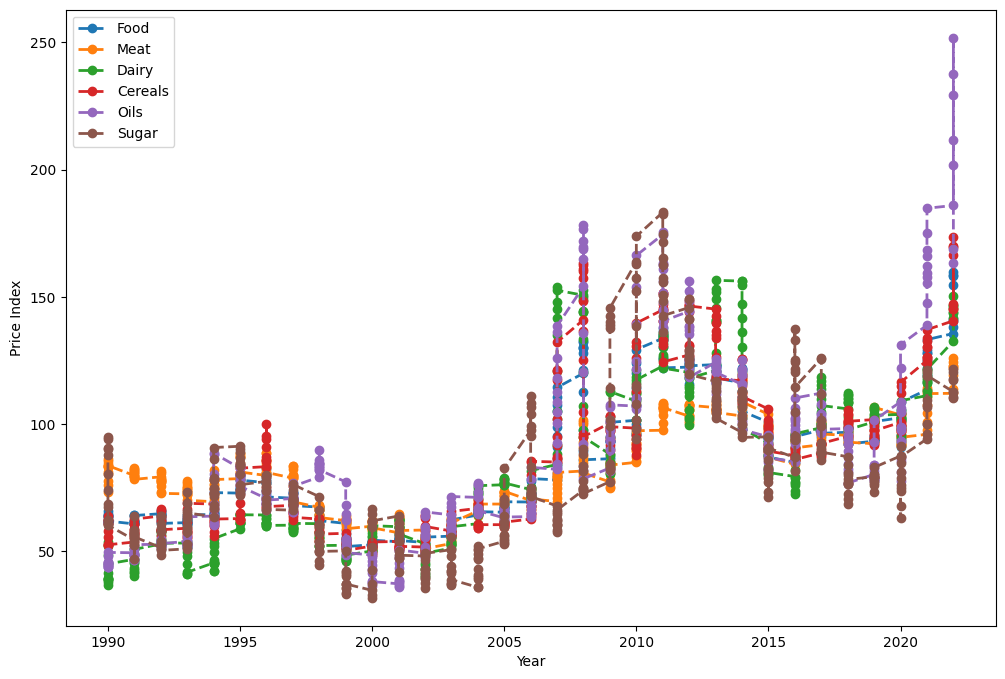

In [18]:
#Gör en plot över datan - För år.
df.plot(
    "Year",
    ["Food", "Meat", "Dairy", "Cereals", "Oils", "Sugar"],
    figsize=(12,8),
    xlabel="Year",
    ylabel="Price Index",
    linewidth=2,
    ls="--",
    marker="o"
    
)

Ta medelvärdet för varje år istället.

In [19]:
#Ta medelvärdet för varje år istället.
dfx = df[['Food', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar' ,'Year']]
dfx = dfx.groupby(['Year'], as_index=False).mean()

In [20]:
dfx.head(2)

,Year,Food,Meat,Dairy,Cereals,Oils,Sugar
0,1990,63.016667,81.550000,42.616667,58.083333,45.471667,77.700000
1,1991,62.058333,80.633333,45.466667,57.866667,49.007500,55.483333


<Axes: xlabel='Year'>

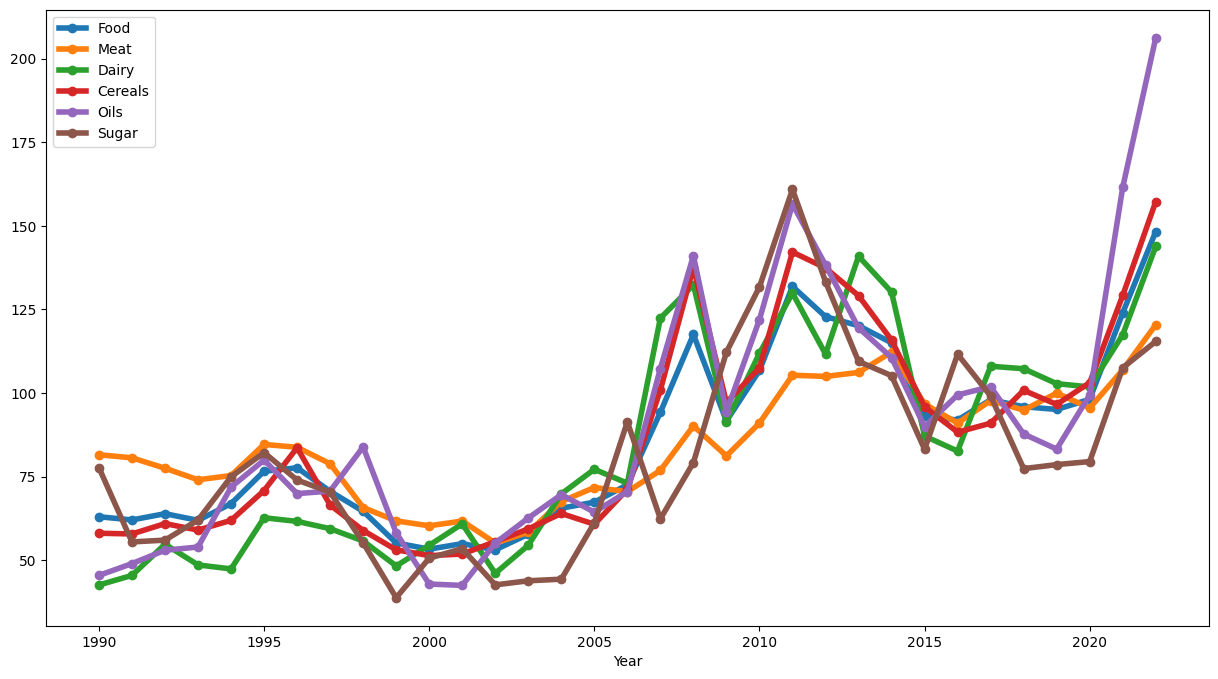

In [23]:
#Gör en plot över datan
dfx.plot("Year",
         ["Food","Meat", "Dairy", "Cereals", "Oils", "Sugar"],
         linewidth=4, linestyle='-', marker="o", figsize=(15, 8)
        )

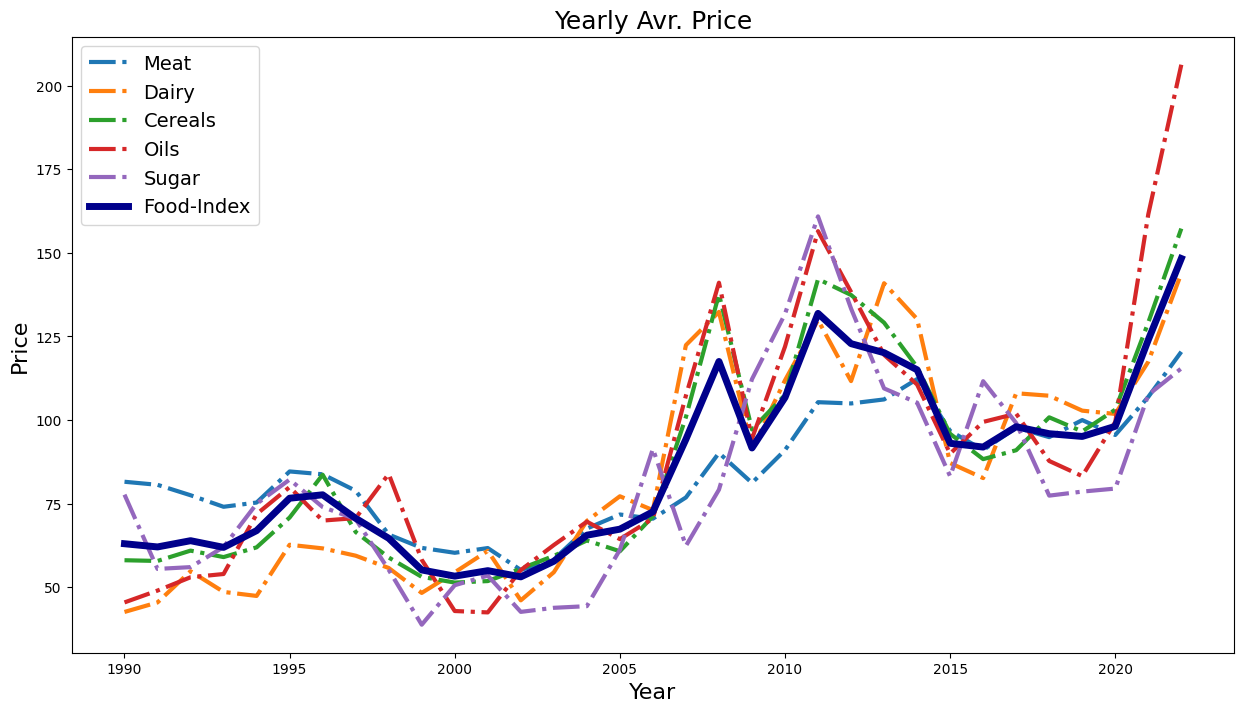

In [25]:
#Gör en plot över datan igen 
dfx.plot("Year",
         ["Meat", "Dairy", "Cereals", "Oils", "Sugar"],
         linewidth=3,
         linestyle='-.',
         figsize=(15 ,8)
        )
#Plotta bara Food-index fast med starkare text.
plt.plot(dfx['Year'], dfx['Food'], color='darkblue', linewidth=5, label='Food-Index')

plt.title('Yearly Avr. Price', fontsize=18)
plt.ylabel('Price', size=16)
plt.xlabel('Year', size=16)
plt.legend(fontsize=14)

Vilket år var matpriserna som billigast?

In [26]:
dfx[dfx['Food'] == dfx['Food'].min()] 

,Year,Food,Meat,Dairy,Cereals,Oils,Sugar
12,2002,53.116667,55.166667,46.091667,55.575,55.145,42.641667


Hur många procent ökade matpriserna från 1990 till 2022?

In [26]:
food_1990 = dfx['Food'][0]
food_2022 = dfx['Food'][len(dfx['Food'])-1]

procent = ((food_2022-food_1990)/food_1990)*100
print(f"Matpriserna ökade med {procent:.2f}% från 1990 till 2022")

Matpriserna ökade med 135.33% från 1990 till 2022


Hur många procent ökade matpriserna från 2012 till 2022?

In [32]:
food_2012 = dfx['Food'][22]
food_2022 = dfx['Food'][len(dfx['Food'])-1]

procent = ((food_2022-food_2012)/food_2012)*100
print(f"Matpriserna ökade med {procent:.2f}% från 2012 till 2022")

Matpriserna ökade med 20.72% från 2012 till 2022


Vilka år minskade priserna på mat från föregående år?

In [34]:
#Hitta åren
dfx[dfx['Food'] < dfx['Food'].shift(1)]['Year']

1     1991
3     1993
7     1997
8     1998
9     1999
10    2000
12    2002
19    2009
22    2012
23    2013
24    2014
25    2015
26    2016
28    2018
29    2019
Name: Year, dtype: int64